In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests
from pprint import pprint
import datetime
import time

In [2]:
#Create a list of 1500 and latitues and longitudes
lats=np.random.uniform(-90,90, size=5000)
lngs=np.random.uniform(-180,180,size=5000)
lats_lngs=zip(lats,lngs)


In [3]:
#Add the zipped object into a list
coordinates=list(lats_lngs)


In [4]:
#Find cities from coordinates
cities=[]

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
#print(cities)

In [5]:
city_data=[]  #list to store the weather data
set_count=1
record_count=1
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [6]:
#Get the weather info for the cities from the "open weather website" using the open weather key
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if(i%50 ==0 and i>= 50):
        set_count=set_count+1
        record_count=1
    city_url= url+"&q="+city.replace(" ","+")
    #print(city_url)
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count = record_count +1
    try:
        city_weather=requests.get(city_url).json()
        #pprint(city_weather)
        #Parse the data from json object
        city_lat=city_weather["coord"]["lat"]
        #print(city_lat)
        city_lng = city_weather["coord"]["lon"]
        #print(city_lng)
        city_max_temp = city_weather["main"]["temp_max"]
        #print(city_max_temp)
        city_humidity = city_weather["main"]["humidity"]
        #print(city_humidity)
        city_clouds = city_weather["clouds"]["all"]
        #print(city_clouds)
        city_wind = city_weather["wind"]["speed"]
        #print(city_wind)
        city_country = city_weather["sys"]["country"]
        #print(city_country)
       
        # Convert the date to ISO standard.
        city_date = city_weather["dt"]
        #city_date=city_date.strftime('%Y-%m-%d %H:%M:%S')
        #print(city_date)
        #city_date_new=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #print(city_date_new)
        # Append the city information into city_data list.
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | vanimo
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | frutal
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | gotsu
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | henties bay
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 | sibolga
Processing Record 23 of Set 1 | barrow
Processing Record 24 of Set 1 | puerto cortes
City not foun

Processing Record 38 of Set 4 | kununurra
Processing Record 39 of Set 4 | peskovka
Processing Record 40 of Set 4 | mareeba
Processing Record 41 of Set 4 | nabire
Processing Record 42 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | burnie
Processing Record 46 of Set 4 | baruun-urt
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | merauke
Processing Record 49 of Set 4 | gisborne
Processing Record 50 of Set 4 | graneros
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | springdale
Processing Record 3 of Set 5 | mali
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | labuhan
Processing Record 6 of Set 5 | store heddinge
Processing Record 7 of Set 5 | pedasi
Processing Record 8 of Set 5 | san carlos de bariloche
Processing Record 9 of Set 5 | umm durman
City not found. Skipping...
Processi

Processing Record 26 of Set 8 | saint-augustin
Processing Record 27 of Set 8 | atar
Processing Record 28 of Set 8 | pingzhuang
Processing Record 29 of Set 8 | zaraza
Processing Record 30 of Set 8 | weatherford
Processing Record 31 of Set 8 | sedelnikovo
City not found. Skipping...
Processing Record 32 of Set 8 | kajaani
Processing Record 33 of Set 8 | laguna
Processing Record 34 of Set 8 | kenai
Processing Record 35 of Set 8 | atambua
Processing Record 36 of Set 8 | tuatapere
Processing Record 37 of Set 8 | yerofey pavlovich
Processing Record 38 of Set 8 | madridejos
Processing Record 39 of Set 8 | bajo baudo
City not found. Skipping...
Processing Record 40 of Set 8 | bambous virieux
Processing Record 41 of Set 8 | gelemso
Processing Record 42 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 43 of Set 8 | aitape
Processing Record 44 of Set 8 | geraldton
Processing Record 45 of Set 8 | camacha
Processing Record 46 of Set 8 | saint anthony
Processing Record 4

Processing Record 10 of Set 12 | chiredzi
Processing Record 11 of Set 12 | ukiah
Processing Record 12 of Set 12 | esmeraldas
Processing Record 13 of Set 12 | conde
Processing Record 14 of Set 12 | terney
Processing Record 15 of Set 12 | yar-sale
Processing Record 16 of Set 12 | accrington
Processing Record 17 of Set 12 | haldibari
Processing Record 18 of Set 12 | nechi
Processing Record 19 of Set 12 | longlac
City not found. Skipping...
Processing Record 20 of Set 12 | vao
Processing Record 21 of Set 12 | zhigalovo
Processing Record 22 of Set 12 | jumla
Processing Record 23 of Set 12 | dicabisagan
Processing Record 24 of Set 12 | fairbanks
Processing Record 25 of Set 12 | purranque
Processing Record 26 of Set 12 | hailey
Processing Record 27 of Set 12 | tevriz
Processing Record 28 of Set 12 | port lincoln
Processing Record 29 of Set 12 | udachnyy
Processing Record 30 of Set 12 | tsabong
Processing Record 31 of Set 12 | hrodna
Processing Record 32 of Set 12 | goderich
Processing Record 

Processing Record 49 of Set 15 | les herbiers
Processing Record 50 of Set 15 | mayo
Processing Record 1 of Set 16 | aldan
Processing Record 2 of Set 16 | maceio
Processing Record 3 of Set 16 | kastamonu
Processing Record 4 of Set 16 | batemans bay
Processing Record 5 of Set 16 | at-bashi
Processing Record 6 of Set 16 | bargal
City not found. Skipping...
Processing Record 7 of Set 16 | sovetskiy
Processing Record 8 of Set 16 | tungor
Processing Record 9 of Set 16 | kurilsk
Processing Record 10 of Set 16 | channel-port aux basques
Processing Record 11 of Set 16 | grand forks
Processing Record 12 of Set 16 | kamaishi
Processing Record 13 of Set 16 | ngukurr
City not found. Skipping...
Processing Record 14 of Set 16 | kostolac
Processing Record 15 of Set 16 | katiola
Processing Record 16 of Set 16 | sechura
Processing Record 17 of Set 16 | kalamare
Processing Record 18 of Set 16 | stubbekobing
Processing Record 19 of Set 16 | tabiauea
City not found. Skipping...
Processing Record 20 of Set

Processing Record 33 of Set 19 | toppenish
Processing Record 34 of Set 19 | jacareacanga
Processing Record 35 of Set 19 | warqla
City not found. Skipping...
Processing Record 36 of Set 19 | hovd
Processing Record 37 of Set 19 | barra patuca
Processing Record 38 of Set 19 | leh
Processing Record 39 of Set 19 | livingston
Processing Record 40 of Set 19 | am timan
Processing Record 41 of Set 19 | hervey bay
Processing Record 42 of Set 19 | xiongshi
City not found. Skipping...
Processing Record 43 of Set 19 | areia branca
Processing Record 44 of Set 19 | nardaran
Processing Record 45 of Set 19 | bandar-e lengeh
Processing Record 46 of Set 19 | arman
Processing Record 47 of Set 19 | dubbo
Processing Record 48 of Set 19 | ekhabi
Processing Record 49 of Set 19 | kuusamo
Processing Record 50 of Set 19 | hamamatsu
Processing Record 1 of Set 20 | palimbang
Processing Record 2 of Set 20 | yashkul
Processing Record 3 of Set 20 | catamarca
Processing Record 4 of Set 20 | tucuma
Processing Record 5 

Processing Record 14 of Set 23 | mildura
Processing Record 15 of Set 23 | anaco
Processing Record 16 of Set 23 | kiruna
Processing Record 17 of Set 23 | pavilosta
Processing Record 18 of Set 23 | rio grande
Processing Record 19 of Set 23 | abu dhabi
Processing Record 20 of Set 23 | tabou
Processing Record 21 of Set 23 | wattegama
Processing Record 22 of Set 23 | jackson
Processing Record 23 of Set 23 | boende
Processing Record 24 of Set 23 | micheweni
Processing Record 25 of Set 23 | viloco
Processing Record 26 of Set 23 | okha
Processing Record 27 of Set 23 | besikduzu
Processing Record 28 of Set 23 | daru
Processing Record 29 of Set 23 | bani
Processing Record 30 of Set 23 | san jose
Processing Record 31 of Set 23 | wajir
Processing Record 32 of Set 23 | yumen
Processing Record 33 of Set 23 | walvis bay
Processing Record 34 of Set 23 | leonidovo
Processing Record 35 of Set 23 | inhambane
Processing Record 36 of Set 23 | reefton
City not found. Skipping...
Processing Record 37 of Set 

Processing Record 5 of Set 27 | satitoa
City not found. Skipping...
Processing Record 6 of Set 27 | bamiantong
Processing Record 7 of Set 27 | jaen
Processing Record 8 of Set 27 | kindu
Processing Record 9 of Set 27 | darhan
Processing Record 10 of Set 27 | goure
Processing Record 11 of Set 27 | pandan
Processing Record 12 of Set 27 | kangaatsiaq
Processing Record 13 of Set 27 | padang
Processing Record 14 of Set 27 | kutum
Processing Record 15 of Set 27 | sao jose da coroa grande
Processing Record 16 of Set 27 | oksfjord
Processing Record 17 of Set 27 | altamira
Processing Record 18 of Set 27 | rorvik
Processing Record 19 of Set 27 | mahon
Processing Record 20 of Set 27 | tahoua
Processing Record 21 of Set 27 | mosalsk
Processing Record 22 of Set 27 | kem
Processing Record 23 of Set 27 | mbaiki
Processing Record 24 of Set 27 | malanje
Processing Record 25 of Set 27 | trinidad
Processing Record 26 of Set 27 | lindsay
Processing Record 27 of Set 27 | mazagao
Processing Record 28 of Set 

In [7]:
print(city_data[1])

{'City': 'busselton', 'Lat': -33.65, 'Lng': 115.3333, 'Max Temp': 55.09, 'Humidity': 84, 'Cloudiness': 86, 'Wind Speed': 6.96, 'Country': 'AU', 'Date': 1622836853}


In [8]:
#pprint(city_weather)

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

In [11]:
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,hermanus,ZA,1622836852,-34.4187,19.2345,54.90,84,13,10.18
1,busselton,AU,1622836853,-33.6500,115.3333,55.09,84,86,6.96
2,norman wells,CA,1622836853,65.2820,-126.8329,51.49,73,100,10.29
3,arraial do cabo,BR,1622836854,-22.9661,-42.0278,74.48,85,0,13.76
4,mataura,NZ,1622836854,-46.1927,168.8643,49.48,86,100,6.35
...,...,...,...,...,...,...,...,...,...
1248,hoi an,VN,1622837382,15.8794,108.3350,80.56,85,100,3.94
1249,marivan,IR,1622837382,35.5219,46.1760,65.77,28,0,1.79
1250,shima,CN,1622837383,24.4478,117.8111,73.33,94,100,4.21
1251,cooma,AU,1622837383,-36.2333,149.1333,28.54,93,18,0.94


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

PermissionError: [Errno 13] Permission denied: 'weather_data/cities.csv'

In [ ]:
#Create scatter plot for latitude versus maximum temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black", linewidths=1, marker="o",alpha=0.8,label="Cities")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend()
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
#function for creating chart using linear regression
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values) #lineregress function from data
    regress_values=x_values*slope + intercept  #get the y values 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))  #get the line equation
    #plot the scatter chard
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
#Create north and south hemisphere data frames from city_data_df

north_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]
south_hemi_df=city_data_df.loc[city_data_df['Lat']<0]
north_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,norman wells,CA,1622836853,65.2820,-126.8329,51.49,73,100,10.29
6,kapaa,US,1622836674,22.0752,-159.3190,80.58,83,41,5.01
7,provideniya,RU,1622836855,64.3833,-173.3000,36.84,64,44,5.68
14,gotsu,JP,1622836859,35.0000,132.2167,62.37,62,100,7.90
15,albany,US,1622836859,42.6001,-73.9662,82.17,61,100,4.27


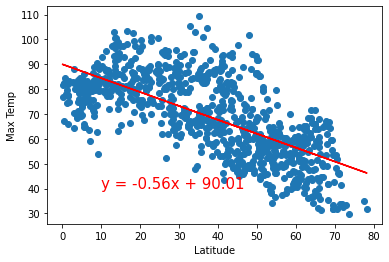

In [28]:
#Linear regression on north hemisphere temperature
x_values=north_hemi_df['Lat']
y_values=north_hemi_df['Max Temp']
title="Linear Regression on the Northern Hemisphere for Maximum Temperature"
y_label="Max Temp"
text_coordinates=(10,40)

plot_linear_regression(x_values,y_values,title,y_label,text_coordinates)

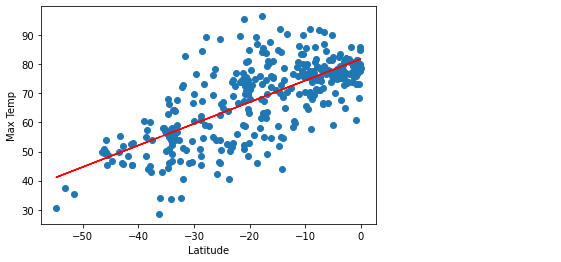

In [31]:
#Linear regression on south hemisphere temperature
plot_linear_regression(south_hemi_df['Lat'],south_hemi_df['Max Temp'],"Linear Regression",y_label,(10,40))